In [1]:
library(Seurat)
library(ggpubr)
library(ggsignif)
library(ggplot2)
obj.integrated=readRDS(file = "../05.2-subtype/scRNA_annodata.KC.rds")
#obj.integrated=subset(obj.integrated,idents = c('SC','BC','SC_BC'))
Idents(obj.integrated) <- "celltype2" #######也就是合并的celltype
obj.integrated=subset(obj.integrated,idents = c('SC','SC_BC','BC'))

obj.integrated$celltype.g <- paste(Idents(obj.integrated), obj.integrated$group, sep = "_")
Idents(obj.integrated) <- "celltype.g"
table(Idents(obj.integrated))

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: ggplot2




    SC_young     BC_young  SC_BC_young    SC_middle    BC_middle SC_BC_middle 
        3196         2587         1436         2373         2803         1312 
     SC_aged      BC_aged   SC_BC_aged 
        5276         3928         2457 

In [3]:
gene=readRDS('bm.pathway.rds')
head(gene,2)
names(gene)

$`basement membrane`
  [1] "ACHE"     "ACAN"     "ANG"      "ANXA2"    "ANXA2P2"  "APLP1"   
  [7] "DST"      "ENTPD2"   "CD151"    "COL2A1"   "COL4A1"   "COL4A2"  
 [13] "COL4A3"   "COL4A4"   "COL4A5"   "COL4A6"   "COL5A1"   "COL7A1"  
 [19] "COL8A1"   "COL8A2"   "COL9A1"   "COL9A3"   "COL15A1"  "COL17A1" 
 [25] "CST3"     "DAG1"     "DLG1"     "EFNA5"    "MEGF9"    "FBLN1"   
 [31] "FBN1"     "FGF9"     "FN1"      "HSPG2"    "TNC"      "ITGA6"   
 [37] "LAD1"     "LAMA2"    "LAMA3"    "LAMA4"    "LAMA5"    "LAMB1"   
 [43] "LAMB2"    "LAMB3"    "LAMC1"    "LAMC2"    "LOXL1"    "LOXL2"   
 [49] "MATN2"    "NID1"     "NTN3"     "SERPINF1" "PTN"      "SPARC"   
 [55] "TGFBI"    "THBS2"    "THBS4"    "TIMP1"    "TIMP3"    "USH2A"   
 [61] "VTN"      "COLQ"     "ATRN"     "CASK"     "TMEFF1"   "NTN1"    
 [67] "ADAMTS1"  "LAMC3"    "NID2"     "LAMB4"    "NTNG1"    "TMEFF2"  
 [73] "EGFL6"    "ATRNL1"   "TINAG"    "EFEMP2"   "P3H2"     "ERBIN"   
 [79] "NTN4"     "SMOC1"    "SMOC2"    "VWA1"     "MMRN2"    "FRAS1"   
 [85] "COL18A1"  "HMCN1"    "NTNG2"    "NTN5"     "OTOL1"    "EGFLAM"  
 [91] "CCDC80"   "FREM1"    "FREM3"    "NPNT"     "HMCN2"    "LAMA1"   
 [97] "RELL2"    "COL28A1"  "VWA2"     "FREM2"    "VWC2"     "AGRN"    
[103] "AMTN"    

$`basement membrane disassembly`
[1] "CMA1" "CTSS" "HPN"

[1] "basement membrane"                           
[2] "basement membrane disassembly"               
[3] "basement membrane organization"              
[4] "basement membrane assembly"                  
[5] "basement membrane collagen trimer"           
[6] "regulation of basement membrane organization"

In [4]:
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[1]]),name=names(gene)[1])
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[2]]),name=names(gene)[2])
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[3]]),name=names(gene)[3])
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[4]]),name=names(gene)[4])
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[5]]),name=names(gene)[5])
obj.integrated=AddModuleScore(obj.integrated,features = list(gene[[6]]),name=names(gene)[6])
head(obj.integrated,2)

Warning message:
“The following features are not present in the object: ANXA2P2, NTN3, USH2A, TMEFF1, TINAG, P3H2, ERBIN, NTNG2, OTOL1, FREM3, LAMA1, not searching for symbol synonyms”
Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is basement.membrane1; see ?make.names for more details on syntax validity”
Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is basement.membrane.disassembly1; see ?make.names for more details on syntax validity”
Warning message:
“The following features are not present in the object: NTNG2, not searching for symbol synonyms”
Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is basement.membrane.organization1; see ?make.names for more details on syntax validity”
Warning message:
“The following features are not present in the object: NTNG2, not searching for symbol synonyms”
Warning message:
“Invalid name supplied, ma

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,group2,percent.mito,integrated_snn_res.1.8,seurat_clusters,integrated_snn_res.1.6,⋯,BC1,nCount_integrated,nFeature_integrated,celltype.g,basement.membrane1,basement.membrane.disassembly1,basement.membrane.organization1,basement.membrane.assembly1,basement.membrane.collagen.trimer1,regulation.of.basement.membrane.organization1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Skin-Y-18_AAACCTGCACAGTCGC-18,Skin-Y-18,10128,3125,Skin-Y-18,young,18,0.07099131,0,2,2,⋯,-0.4098248,0,0,SC_young,-0.03857024,-0.01965936,-0.1459694,-0.05506732,-0.01753929,0.04583772
Skin-Y-18_AAACCTGGTCTCAACA-18,Skin-Y-18,4145,1426,Skin-Y-18,young,18,0.14282268,9,4,14,⋯,0.6968192,0,0,SC_young,-0.05875124,-0.01814850,-0.1142558,-0.04967172,-0.01087621,-0.05359540


# 提取重做

In [5]:
Idents(obj.integrated)=obj.integrated$celltype2
obj.integrated2=subset(obj.integrated,idents = c('BC'))

In [6]:
head(obj.integrated2,2)
gene1=c('basement.membrane1','basement.membrane.organization1','basement.membrane.assembly1','regulation.of.basement.membrane.organization1')
meta <- data.frame(FetchData(object = obj.integrated2, vars = c(gene1,'celltype2','celltype.g')))

,orig.ident,nCount_RNA,nFeature_RNA,sample,group,group2,percent.mito,integrated_snn_res.1.8,seurat_clusters,integrated_snn_res.1.6,⋯,BC1,nCount_integrated,nFeature_integrated,celltype.g,basement.membrane1,basement.membrane.disassembly1,basement.membrane.organization1,basement.membrane.assembly1,basement.membrane.collagen.trimer1,regulation.of.basement.membrane.organization1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Skin-Y-18_AAACGGGCACACCGAC-18,Skin-Y-18,6050,2006,Skin-Y-18,young,18,0.12727273,8,20,9,⋯,2.120457,0,0,BC_young,0.01427811,-0.02601735,-0.06677004,0.08050637,-0.01482001,0.14411708
Skin-Y-18_AAAGATGCAATGCCAT-18,Skin-Y-18,7865,2703,Skin-Y-18,young,18,0.06802289,1,0,1,⋯,1.928468,0,0,BC_young,0.07629399,-0.01242071,0.09374849,0.01803662,-0.01981852,0.09421257


In [7]:
exp=t(as.matrix(obj.integrated2@assays$RNA@data))
exp[1:4,1:4]
table(rownames(exp)==rownames(meta))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


,RP11-34P13.7,AL627309.1,AP006222.2,RP5-857K21.4
Skin-Y-18_AAACGGGCACACCGAC-18,0,0,0,0
Skin-Y-18_AAAGATGCAATGCCAT-18,0,0,0,0
Skin-Y-18_AAAGCAAAGATCGGGT-18,0,0,0,0
Skin-Y-18_AAAGCAAGTGATAAAC-18,0,0,0,0



TRUE 
9318 

In [8]:
if(!dir.exists('corplot-BM')){
    dir.create('corplot-BM')
}
library(psych)
g=unique(gene$`basement membrane`)
g=g[g%in%colnames(exp)]
cor_matrix=data.frame(gene=g,r=0,p=0)
rownames(cor_matrix)=cor_matrix$gene
myCor = corr.test(exp[,'COL17A1'],meta[,'basement.membrane1'],  
               use = "pairwise", # 缺失值处理的方式
               method="pearson", # 计算相关性的方法有"pearson", "spearman", "kendall"
               adjust = "none"   # p值矫正的方法
)
myCor$r # 查看相关性结果
myCor$p # 查看p值


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




[1] 0.5092524

[1] 0

In [9]:
for(i in g){
    tt=as.data.frame(cbind(exp[,i],meta[,'basement.membrane1']))
    colnames(tt)=c(i,'basement.membrane1')
    myCor = corr.test(tt[,i],tt[,'basement.membrane1'],  
               use = "pairwise", # 缺失值处理的方式
               method="pearson", # 计算相关性的方法有"pearson", "spearman", "kendall"
               adjust = "none"   # p值矫正的方法
    )
    cor_matrix[i,'r']=myCor$r
    cor_matrix[i,'p']=myCor$p
    plt=ggscatter(tt, x = i, y = "basement.membrane1",color = "#00AFBB",size=1,
          add = "reg.line", conf.int = TRUE,    
          add.params = list(color = "red", fill = "lightgray")
          
    )+
    stat_cor(method = "pearson")
    ggsave(paste0('corplot-BM/',i,'.png'),plt,width = 5,height = 5)
}

Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”
Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”


In [10]:
#cor_matrix=cor_matrix[cor_matrix$p<0.05,]
cor_matrix=cor_matrix[order(cor_matrix$r,decreasing = T),]
cor_matrix$rank=length(cor_matrix$gene):1
head(cor_matrix,10)

,gene,r,p,rank
,<chr>,<dbl>,<dbl>,<int>
COL17A1,COL17A1,0.5092524,0.000000e+00,92
TGFBI,TGFBI,0.3602412,1.469747e-283,91
DST,DST,0.3550203,6.849931e-275,90
ITGA6,ITGA6,0.3478503,2.993032e-263,89
SPARC,SPARC,0.3379144,1.286600e-247,88
LAMB3,LAMB3,0.2975701,7.644002e-190,87
CST3,CST3,0.2940527,3.176444e-185,86
LAMB4,LAMB4,0.2793620,1.237735e-166,85
COL18A1,COL18A1,0.2788026,6.005053e-166,84


In [11]:
top10=cor_matrix[1:10,]
top10$gene

[1] "COL17A1" "TGFBI"   "DST"     "ITGA6"   "SPARC"   "LAMB3"   "CST3"   
 [8] "LAMB4"   "COL18A1" "LAD1"

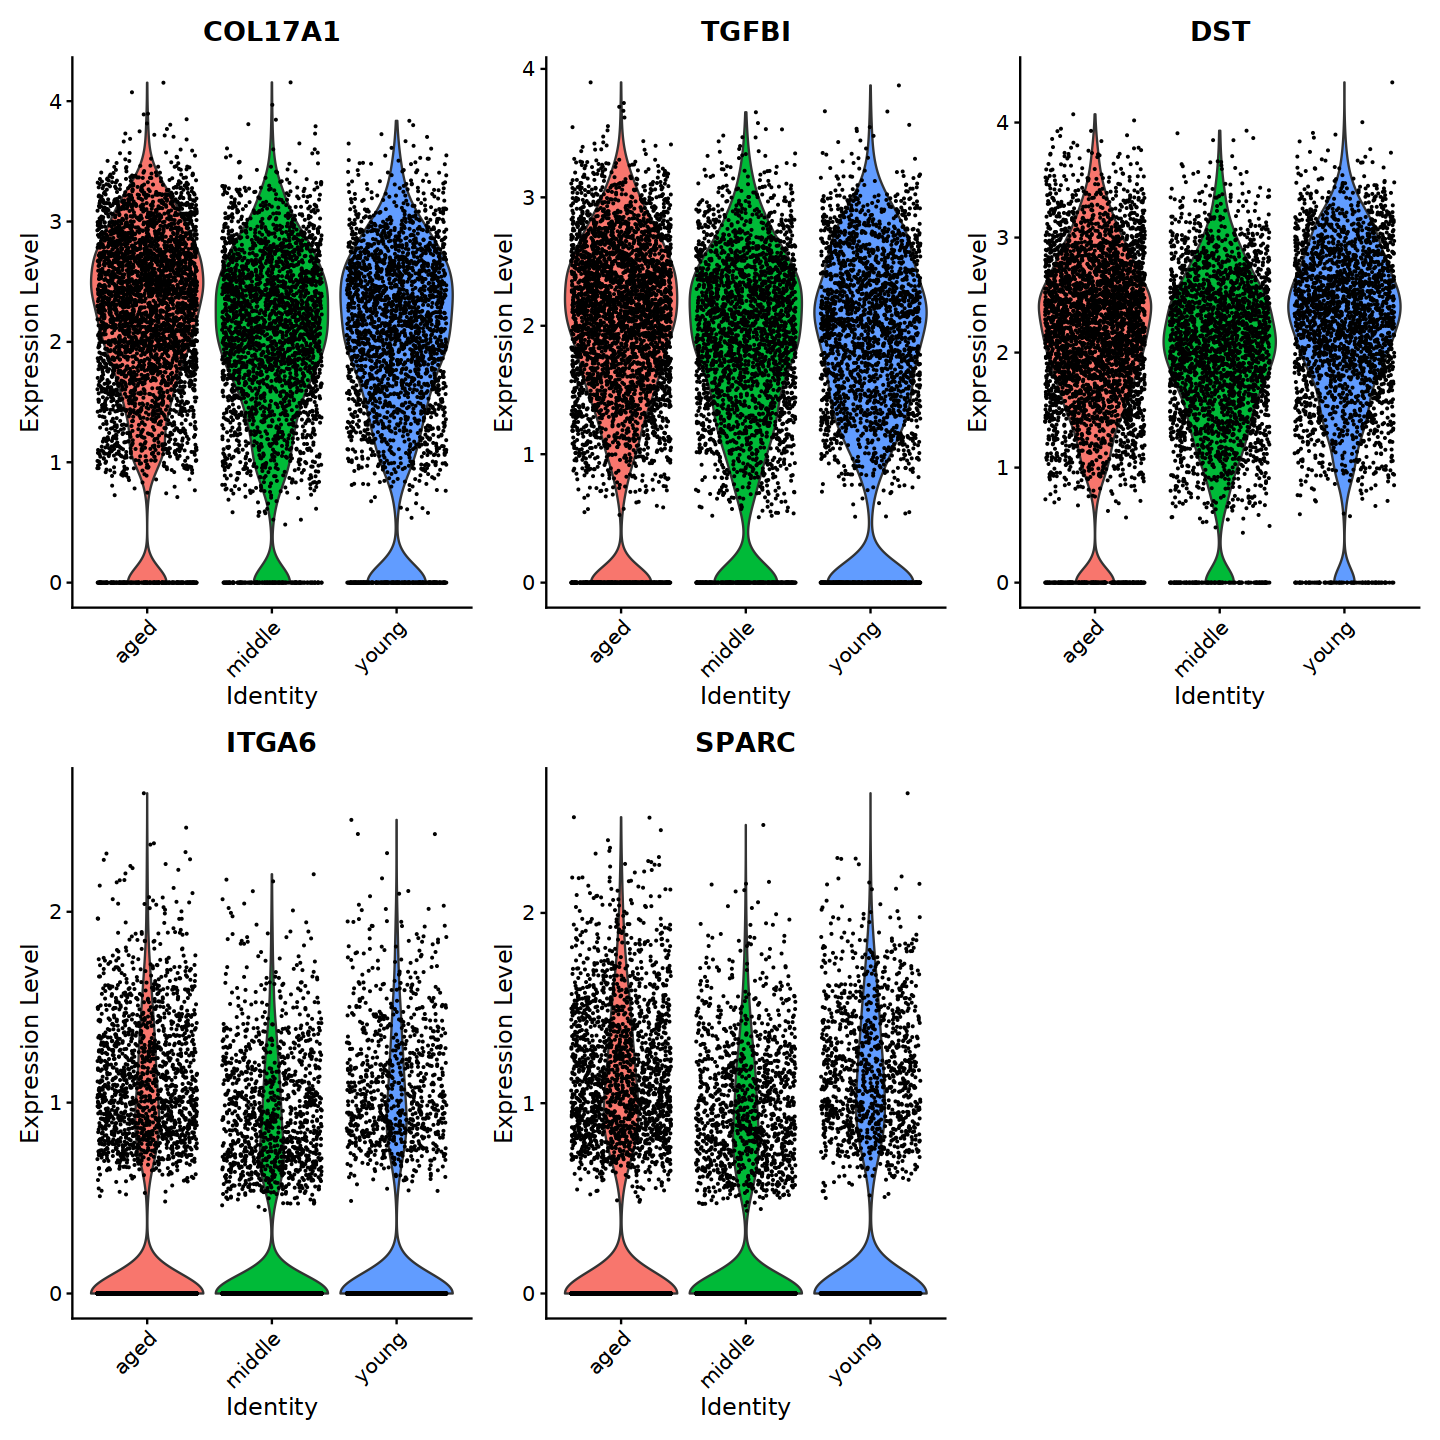

In [14]:
options(repr.plot.width=12, repr.plot.height=12)
bc=subset(obj.integrated,idents=c('BC'))
VlnPlot(bc,features = rownames(cor_matrix)[1:5],group.by = 'group')

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


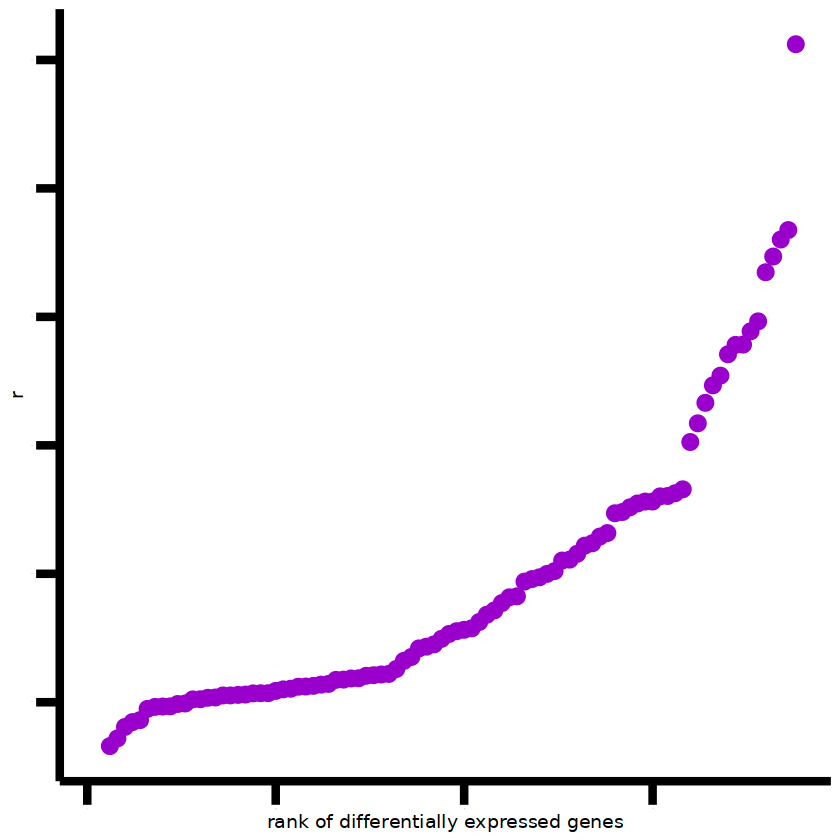

In [56]:
ggplot(cor_matrix, aes(x=rank, y=r))+
  geom_point(color='#9900CC',size=4)+
  #geom_hline(yintercept = c(2,-2), linetype=2, size=0.25)+
  #geom_hline(yintercept = c(0), linetype=1, size=0.5)+
  #geom_vline(xintercept = sum(pre_ranked_all_genes$trend == 'down')+0.5, linetype=2, size=0.25)+
  #ggrepel::geom_text_repel(inherit.aes = F, data = top10, aes(x=rank, y=r, label=gene, color='red'), 
  #                         size=3, direction = 'y')+
  #scale_color_manual(values=c('bottom5'='blue', 'top5'='red', 'medium'='black'))+
  scale_size_continuous(name='-log10(FDR)')+
  #scale_y_continuous(breaks=c(-5, -2, 0, 2, 5, 10))+
  xlab('rank of differentially expressed genes')+
  #theme_bw()+
  theme(panel.background = element_blank(),axis.line.x = element_line(color="black",size=1.8),
        axis.line.y = element_line(color="black",size=1.8),
        axis.text.x = element_text(size=0),axis.text.y = element_text(size=0),axis.line = element_line(colour = "black"),
             axis.ticks.x=element_line(color="black",size=1.8),legend.key = element_blank(),
      axis.ticks.y=element_line(color="black",size=1.8),axis.ticks.length.x = unit(0.5,'cm'), 
      axis.ticks.length.y = unit(0.5,'cm'))
ggsave('corplot-BM/BMrankplot.png',width = 11,height = 10)


In [ ]:
if(!dir.exists('corplot-BMorganization')){
    dir.create('corplot-BMorganization')
}
library(psych)
g2=unique(gene$`basement membrane organization`)
g2=g2[g2%in%colnames(exp)]
cor_matrix2=data.frame(gene=g2,r=0,p=0)
rownames(cor_matrix2)=cor_matrix2$gene
for(i in g2){
    tt=as.data.frame(cbind(exp[,i],meta[,'basement.membrane.organization1']))
    colnames(tt)=c(i,'basement.membrane.organization1')
    myCor = corr.test(tt[,i],tt[,'basement.membrane.organization1'],  
               use = "pairwise", # 缺失值处理的方式
               method="pearson", # 计算相关性的方法有"pearson", "spearman", "kendall"
               adjust = "none"   # p值矫正的方法
    )
    cor_matrix2[i,'r']=myCor$r
    cor_matrix2[i,'p']=myCor$p
    plt=ggscatter(tt, x = i, y = "basement.membrane.organization1",color = "#00AFBB",size=1,
          add = "reg.line", conf.int = TRUE,    
          add.params = list(color = "red", fill = "lightgray")
          
    )+
    stat_cor(method = "pearson")
    ggsave(paste0('corplot-BMorganization/',i,'.png'),plt,width = 5,height = 5)
}


In [ ]:
cor_matrix2=cor_matrix2[cor_matrix2$p<0.05,]
cor_matrix2=cor_matrix2[order(abs(cor_matrix2$r),decreasing = T),]
head(cor_matrix2,10)

# violinPlot

In [126]:
highg=c(rownames(cor_matrix)[1:10],'LAMB3','COL15A1','ADAMTS15','ADAM15','ADAMTS8')
#gene1=c('basement.membrane1','basement.membrane.disassembly1','basement.membrane.organization1','basement.membrane.assembly1',
#       'basement.membrane.collagen.trimer1','regulation.of.basement.membrane.organization1')
if(!dir.exists('violin.highcor')){
    dir.create('violin.highcor')
}
for(i in highg){
    tt=as.data.frame(cbind(exp[,i],meta[,'celltype.g']))
    colnames(tt)=c('gene','celltype.g')
    tt$celltype.g=factor(tt$celltype.g,levels = c('SC_aged','SC_middle','SC_young','SC_BC_aged','SC_BC_middle','SC_BC_young',
                                                  'BC_aged','BC_middle','BC_young'))
    tt$gene=as.numeric(tt$gene)
    #compar=list(c('BC_aged','BC_middle'),c('BC_middle','BC_young'),c('BC_aged','BC_young'))
    compar=list(c('BC_aged','BC_middle'),c('BC_middle','BC_young'),c('BC_aged','BC_young'))

    plot=ggplot(data = tt,mapping = aes(x = celltype.g,y = gene)) +
    geom_violin(scale = "width",adjust =1,trim = TRUE,mapping = aes(fill = celltype.g),position = position_dodge(0.9))+
    stat_summary (fun.data="mean_sdl", fun.args = list (mult=1), geom="pointrange", color = "red")+
        #geom_boxplot(width = 0.2,position = position_dodge(0.9))+
    theme(panel.background = element_blank(),axis.title.x = element_blank(),axis.title.y = element_blank(),
       axis.text.x = element_text(size=10),axis.text.y = element_text(size=10),axis.line = element_line(colour = "black"))+ggtitle(i)+
    stat_compare_means(comparisons = compar,label = "p.signif",size=10,p.adjust.methods='bonferroni')
    ggsave(paste0('violin.highcor/',i,'.png'),plot,width = 10,height = 10)
}
